In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install -q keras

In [ ]:
import keras

In [ ]:
import tensorflow as tf
import numpy as np


In [ ]:
import pandas as pd
import numpy as np
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras_preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import math
import datetime
import time

In [ ]:
#Default dimensions we found online
img_width, img_height = 224, 224

#Create a bottleneck file
top_model_weights_path = 'bottleneck_fc_model.h5'
# loading up our datasets
train_data_dir='/content/drive/MyDrive/data_rename/train'
validation_data_dir='/content/drive/MyDrive/data_rename/test'
# number of epochs to train top model
epochs = 7 #this has been changed after multiple model run
# batch size used by flow_from_directory and predict_generator
batch_size = 50

In [ ]:
#Loading vgc16 model
vgg16=applications.VGG16(include_top=False, weights='imagenet')
datagen = ImageDataGenerator(rescale=1. / 255)
#needed to create the bottleneck .npy files

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
#train- creation of weights and features using vgg16
start = datetime.datetime.now()

generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

nb_train_samples = len(generator.filenames)
num_classes = len(generator.class_indices)

predict_size_train = int(math.ceil(nb_train_samples / batch_size))

bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train)

np.save('bottleneck_features_train.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print('Time: ', elapsed)

Found 3360 images belonging to 4 classes.
Time:  0:31:07.120718


In [ ]:
#validation -creation of weights and features using vgg16
start = datetime.datetime.now()

generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

nb_validation_samples = len(generator.filenames)
num_classes = len(generator.class_indices)

predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))

bottleneck_features_validation = vgg16.predict_generator(generator, predict_size_validation)

np.save('bottleneck_features_validation.npy', bottleneck_features_validation)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 450 images belonging to 4 classes.
Time:  0:05:22.351747


In [ ]:
start = datetime.datetime.now()
datagen_top = ImageDataGenerator(rescale=1./255)
generator_top = datagen_top.flow_from_directory(
         train_data_dir,
         target_size=(img_width, img_height),
         batch_size=batch_size,
         class_mode='categorical',
         shuffle=False)

nb_train_samples = len(generator_top.filenames)
num_classes = len(generator_top.class_indices)

# load the bottleneck features saved earlier
train_data = np.load('bottleneck_features_train.npy')

# get the class lebels for the training data, in the original order
train_labels = generator_top.classes

# convert the training labels to categorical vectors
train_labels = to_categorical(train_labels, num_classes=num_classes)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)


Found 3360 images belonging to 4 classes.
Time:  0:00:01.865465


In [ ]:
generator_top = datagen_top.flow_from_directory(
         validation_data_dir,
         target_size=(img_width, img_height),
         batch_size=batch_size,
         class_mode=None,
         shuffle=False)

nb_validation_samples = len(generator_top.filenames)

validation_data = np.load('bottleneck_features_validation.npy')


validation_labels = generator_top.classes
validation_labels = to_categorical(validation_labels, num_classes=num_classes)


Found 450 images belonging to 4 classes.


In [ ]:
#method1
start = datetime.datetime.now()
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='rmsprop',
          loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels,
      epochs=5,
      batch_size=batch_size,
      validation_data=(validation_data, validation_labels))

model.save_weights(top_model_weights_path)

(eval_loss, eval_accuracy) = model.evaluate(
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)


Epoch 1/5


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
34/34 [==============================] - ETA: 0s - loss: 3.6270 - accuracy: 0.4536

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
34/34 [==============================] - 7s 184ms/step - loss: 3.6270 - accuracy: 0.4536 - val_loss: 1.1773 - val_accuracy: 0.4622
Epoch 2/5
34/34 [==============================] - 4s 105ms/step - loss: 0.9865 - accuracy: 0.5747 - val_loss: 1.2567 - val_accuracy: 0.4333
Epoch 3/5
34/34 [==============================] - 4s 106ms/step - loss: 0.9047 - accuracy: 0.6128 - val_loss: 0.7994 - val_accuracy: 0.6333
Epoch 4/5
34/34 [==============================] - 4s 129ms/step - loss: 0.7897 - accuracy: 0.6548 - val_loss: 0.7998 - val_accuracy: 0.6378
Epoch 5/5
5/5 [==============================] - 0s 32ms/step - loss: 0.8632 - accuracy: 0.5844
[INFO] 

In [ ]:
#method2
start = datetime.datetime.now()
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit(train_data, train_labels,
      epochs=7,
      batch_size=batch_size,
      validation_data=(validation_data, validation_labels))

model.save_weights(top_model_weights_path)

(eval_loss, eval_accuracy) = model.evaluate(
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)


Epoch 1/7


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
33/34 [============================>.] - ETA: 0s - loss: 1.2398 - acc: 0.4394

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
34/34 [==============================] - 2s 56ms/step - loss: 1.2356 - acc: 0.4423 - val_loss: 1.0191 - val_acc: 0.5378
Epoch 2/7
34/34 [==============================] - 2s 52ms/step - loss: 1.0199 - acc: 0.5577 - val_loss: 0.9351 - val_acc: 0.5800
Epoch 3/7
34/34 [==============================] - 2s 50ms/step - loss: 0.9131 - acc: 0.6051 - val_loss: 0.8549 - val_acc: 0.6200
Epoch 4/7
34/34 [==============================] - 2s 51ms/step - loss: 0.8584 - acc: 0.6467 - val_loss: 0.8020 - val_acc: 0.6311
Epoch 5/7
34/34 [==============================] - 2s 50ms/step - loss: 0.7992 - acc: 0.6607 - val_loss: 0.7685 - val_acc: 0.6444
Epoch 6/7
34/34 [

In [ ]:
#method3
import keras
from keras import optimizers
start = datetime.datetime.now()
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dropout(0.5))
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit(train_data, train_labels,
      epochs=7,
      batch_size=batch_size,
      validation_data=(validation_data, validation_labels))

model.save_weights(top_model_weights_path)

(eval_loss, eval_accuracy) = model.evaluate(
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Epoch 1/7


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
33/34 [============================>.] - ETA: 0s - loss: 1.2521 - acc: 0.4597

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
34/34 [==============================] - 3s 67ms/step - loss: 1.2460 - acc: 0.4640 - val_loss: 1.0164 - val_acc: 0.5400
Epoch 2/7
34/34 [==============================] - 2s 59ms/step - loss: 0.9328 - acc: 0.6048 - val_loss: 0.9737 - val_acc: 0.5689
Epoch 3/7
34/34 [==============================] - 2s 60ms/step - loss: 0.8171 - acc: 0.6557 - val_loss: 0.7798 - val_acc: 0.6378
Epoch 4/7
34/34 [==============================] - 2s 59ms/step - loss: 0.7661 - acc: 0.6795 - val_loss: 0.8719 - val_acc: 0.5711
Epoch 5/7
34/34 [==============================] - 2s 58ms/step - loss: 0.7045 - acc: 0.6994 - val_loss: 0.7929 - val_acc: 0.6556
Epoch 6/7
34/34 [

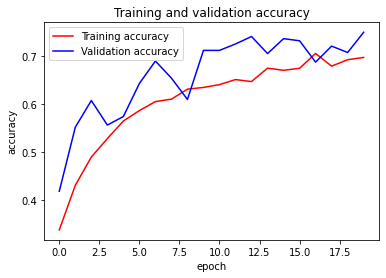

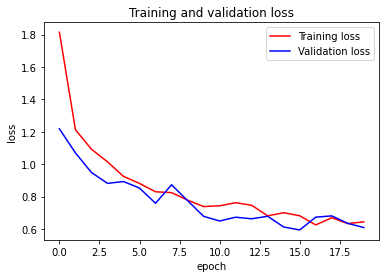

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()


In [ ]:
#method4
start = datetime.datetime.now()
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='rmsprop',
          loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels,
      epochs=20,
      batch_size=batch_size,
      validation_data=(validation_data, validation_labels))

model.save_weights(top_model_weights_path)

(eval_loss, eval_accuracy) = model.evaluate(
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Epoch 1/20


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
34/34 [==============================] - ETA: 0s - loss: 1.8140 - accuracy: 0.3372

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
34/34 [==============================] - 6s 148ms/step - loss: 1.8140 - accuracy: 0.3372 - val_loss: 1.2179 - val_accuracy: 0.4178
Epoch 2/20
34/34 [==============================] - 3s 98ms/step - loss: 1.2126 - accuracy: 0.4301 - val_loss: 1.0696 - val_accuracy: 0.5511
Epoch 3/20
34/34 [==============================] - 3s 94ms/step - loss: 1.0924 - accuracy: 0.4890 - val_loss: 0.9489 - val_accuracy: 0.6067
Epoch 4/20
34/34 [==============================] - 3s 97ms/step - loss: 1.0149 - accuracy: 0.5274 - val_loss: 0.8817 - val_accuracy: 0.5556
Epoch 5/20
34/34 [==============================] - 3s 95ms/step - loss: 0.9247 - accuracy: 0.5640 - va

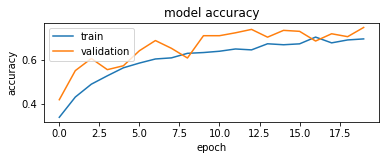

In [ ]:
plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')


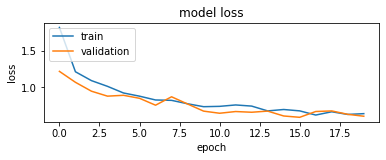

In [ ]:
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



In [ ]:

model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_39 (Flatten)        (None, 25088)             0         
                                                                 
 dense_112 (Dense)           (None, 200)               5017800   
                                                                 
 dropout_71 (Dropout)        (None, 200)               0         
                                                                 
 dense_113 (Dense)           (None, 100)               20100     
                                                                 
 dropout_72 (Dropout)        (None, 100)               0         
                                                                 
 dense_114 (Dense)           (None, 50)                5050      
                                                                 
 dense_115 (Dense)           (None, 4)               

In [ ]:
model.evaluate(test_data, test_labels)

15/15 [==============================] - 1s 34ms/step - loss: 0.6091 - accuracy: 0.7489


[0.6090826988220215, 0.7488889098167419]

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [ ]:
preds = np.round(model.predict(test_data),0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
15/15 [==============================] - 0s 20ms/step


In [ ]:
len(test_labels)

450

In [ ]:

classification_metrics = metrics.classification_report(test_labels, preds)

In [ ]:

print(classification_metrics)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       115
           1       0.70      0.74      0.72       115
           2       0.63      0.23      0.33       115
           3       0.92      0.66      0.77       105

   micro avg       0.82      0.64      0.72       450
   macro avg       0.80      0.64      0.69       450
weighted avg       0.80      0.64      0.69       450
 samples avg       0.64      0.64      0.64       450



In [ ]:
import pandas as pd


In [ ]:
test_labels_tentative = pd.DataFrame(test_labels).idxmax(axis=1)
preds_tentative = pd.DataFrame(preds).idxmax(axis=1)


In [ ]:
test_labels_tentative

0      0
1      0
2      0
3      0
4      0
      ..
445    3
446    3
447    3
448    3
449    3
Length: 450, dtype: int64

In [ ]:
len(test_labels_tentative), len(test_labels)

(450, 450)

In [ ]:
len(preds_tentative), len(preds)

(450, 450)

In [ ]:
confusion_matrix= confusion_matrix(test_labels_tentative, preds_tentative)

In [ ]:
confusion_matrix

array([[114,   1,   0,   0],
       [ 26,  85,   4,   0],
       [ 48,  35,  26,   6],
       [ 25,   0,  11,  69]])

In [ ]:
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')




In [ ]:
import itertools


Normalized confusion matrix


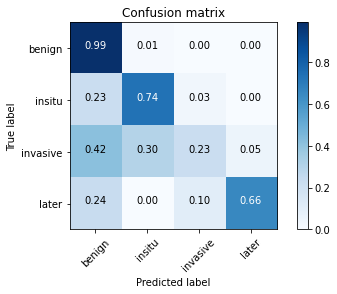

In [ ]:
plot_confusion_matrix(confusion_matrix,
                      ['benign', 'insitu', 'invasive', 'later'],
                     normalize=True)
